## 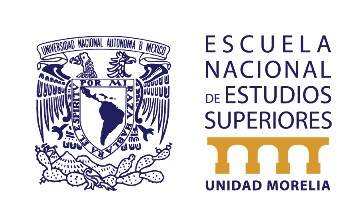
<h2><center>Licenciatura en Tecnologías para la Información en Ciencias</center></h2>
<h2><center>Introducción a la Ciencia de Datos</center></h2>
<h2><center>Proyecto 1: Titanic</center></h2>
<h2><center>Luis David Huante García</center></h2>
<h2><center>Matrícula: 420138905</center></h2>
<h2><center>A 5 de abril de 2022</center></h2>





## Introducción


Todos los proyectos de Ciencia de Datos están conformados por procesos relacionados entre sí que nos permiten obtener información, y posteriormente sabiduría de un conjunto de datos, pero para esto hay que realizar una serie de pasos muy importante para el correcto y adecuado seguimiento del proyecto, así como una obtención de rersultados satisfactoria. En este proyecto se limpiarán los datos a través de un proceso llamado Data Wrangling, por su nombre en inglés. Posteriormente, se buscará interpretar estos datos para obtener información y generar conclusiones sobre el hundimiento del famoso transatlántico británico, el RMS Titanic y sus pasajeros.

## Desarrollo 

Este conjunto de datos registra el número de personas fallecidas, si eran hombres, mujeres o niños, su edad, clase en la que viajaban, el lugar donde embarcaron, la tarifa pagada, entre otros datos. A partir de su correcta y ordenada interpretación, podremos extraer información y conclusiones importantes, e incluso lograr predecir si una instancia, es decir, un perfil de persona con ciertos datos, podría haber sobrevivido el hundimiento dado los datos de la gente que lo hizo. Las herramientas utilizadas en clase, como las bibliotecas Pandas, Numpy, Seaborn y Matplotlib, nos permitirán realizar este proceso de manera efectiva y satisfactoria.

## Código

Recuerden que deben tomar una política con respecto a los datos faltantes e indicarla por
escrito. Además, deben usar todos los gráficos necesarios que les apoyen para responder las
preguntas y/o realizar las tareas solicitadas.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

La política respecto a los datos faltantes consiste en aplicar la función dropna(),dependiendo del contexto de cada pregunta. 

In [2]:
df = pd.read_csv("titanic.csv")
df

,idx,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


#### Dado el conjunto de datos Titanic deberán realizar todo el proceso de Data Wrangling necesario para resolver las siguientes preguntas y tareas:
1. Encontrar el patrón de supervivencia de la catástrofe (el mejor que ustedes puedan obtener). (Valor: 3 puntos)

    a. Por ejemplo: para sobrevivir, se tenía que ser niño de entre 3 meses y 5 años o mujer de
    entre 23 y 32 años; pudiéndose salvar también los hombres mayores de 50 años que
    embarcaron en Cherbourg.
    
    b. Tienen que programar en Python la regla que encontraron, así como determinar la exactitud de la misma (el porcentaje de aciertos que su regla tiene con respecto a la supervivencia indicada en el conjunto de datos).
    

Con las preguntas respondidas en la parte posterior del proyecto, así como la información provista en el enunciado de arriba, podemos definir una regla que nos permita predecir el resultado de la supervivencia. Tomamos en cuenta la información siguiente:
1. Los hombres tenían menos probabilidades de sobrevivir.
2. Los pasajeros de 3era clase tenían menos probabilidades de sobrevivir.
3. La supervivencia era más probable si se embarcaba en Cherbourg o Queenstown.
Después de mirar la información y los datos, podemos ver que:
1. Niños y mujeres eran más probables a sobrevivir si eran de 1era o segunda clase
2. Niños y mujeres eran más probables a sobrevivir si embarcaban en Cherbourg o Queenstown.

Teniendo en cuenta estos parámetros, podemos pasar a programar dicha regla.

In [3]:
def survival(df):
    if (df.pclass!=3 and df.who!='man') or (df.pclass==3 and df.sex=='female' and df.embarked!="S"):
        return 1 #Indica que sobrevivió
    else:
        return 0 #Indica que no sobrevivió

Ahora queremos tener un parámetro para comparar nuestros resultados, acción que podemos realizar con la columna de los supervivientes.

In [4]:
survival_list=df.survived.tolist()

Procedemos a aplicar la regla de supervivencia a nuestro dataframe y agregar las etiquetas correspondientes dependiendo de su resultado.

In [5]:
pattern_labels=[]
for i in range(df.shape[0]):
    pattern_labels.append(survival(df.iloc[i]))

Finalmente, determinamos la exactitud de nuestra regla.

In [6]:
success_rate_comparison=0
for i,_ in enumerate(survival_list):
    if survival_list[i]==pattern_labels[i]:
        success_rate_comparison+=1
success_rate=(success_rate_comparison/891)*100
print("Exactitud:",round(success_rate,1),"%")

Exactitud: 82.5 %


#### 2. ¿Cuál es el pueblo de embarque más mortífero -acorde a la cantidad de fallecimientos total, no el porcentaje relativo-? (Valor: 1 punto)

In [7]:
titanic2 = df[['alive', 'embark_town']]
titanic2.groupby(['alive', 'embark_town']).size()

alive  embark_town
no     Cherbourg       75
       Queenstown      47
       Southampton    427
yes    Cherbourg       93
       Queenstown      30
       Southampton    217
dtype: int64

Agrupamos por las columnas de 'alive' y de 'embark_town'. Observamos que una vez separadas por su tamaño, se registra un mayor número de muertes en Southampton, específicamente 427, por lo que podemos concluir que dicho pueblo es el más mortifero de los 3.

#### 3. ¿Cuál es la tarifa promedio pagada por los sobrevivientes y cuál la de los que no sobrevivieron? (Valor: 1 punto)

In [8]:
titanic3 = df[['alive', 'fare']]
titanic3 = titanic3.groupby(['alive']).mean()
titanic3

,fare
alive,
no,22.117887
yes,48.395408


Agrupamos por las columnas de 'fare' y de 'alive'. Aplicamos el método mean() y obtenemos así la tarifa promedio de los sobrevivientes y fallecidos. 

La tarifa promedio de los sobrevivientes es de 48.395408 y la de los fallecidos es de 22.117887.

#### 4. Realicen un gráfico que muestre lo mejor posible si la clase en la que viajaba el pasajero aseguraba su supervivencia. (Valor: 1 punto)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

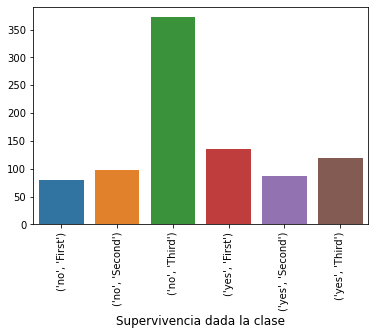

In [9]:
df4 = pd.DataFrame(df, columns=["alive", "class"])
df4 = df4.groupby(['alive', 'class']).size()
#df4.plot(kind = "bar")
plot = sns.barplot(x= df4.index, y = df4.values)
plot.set_xlabel("Supervivencia dada la clase", fontsize = 12)
plt.xticks(rotation=90)


Como podemos observar en la gráfica de barras anterior, hay una diferencia sustancial en el número de fallecidos que pertenecían a la tercera clase comparados a los que sobrevivieron de tercera clase. La barra que la precede en tamaño es la que indica los sobrevivientes de primera clase, entonces sí, se puede afirmar que los pasajeros que viajaban en primera clase tenían más probabilidades de sobrevivir, aunque no por mucho comparado con las otras clases.

#### 5. ¿Cuáles son los porcentajes de supervivencia y fallecimiento de niños, mujeres y hombres? (Valor: 1 punto)

In [10]:
titanic5 = df[['alive', 'who']]
titanic5.groupby(['alive', 'who']).size().transform(lambda x: x*100/x.sum()).round(2)

alive  who  
no     child     3.82
       man      50.39
       woman     7.41
yes    child     5.50
       man       9.88
       woman    23.01
dtype: float64

En esta línea realizamos 3 acciones principalmente, las cuales se explicarán a continuación:

Comenzamos agrupando por las columnas de 'size' y de 'who', y procedemos a extraer el tamaño de cada una de las instancias. En este caso, calcula la suma de cada niño, hombre y mujer, dada su supervivencia.

In [11]:
titanic5.groupby(['alive', 'who']).size()

alive  who  
no     child     34
       man      449
       woman     66
yes    child     49
       man       88
       woman    205
dtype: int64

Posteriomente, aplicamos una función anónima que a cada valor extraído, saca su porcentaje. 

In [12]:
titanic5.groupby(['alive', 'who']).size().transform(lambda x: x*100/x.sum())

alive  who  
no     child     3.815937
       man      50.392817
       woman     7.407407
yes    child     5.499439
       man       9.876543
       woman    23.007856
dtype: float64

Finalmente, redondeamos a 2 decimales, consiguiendo así los porcentajes de supervivencia y fallecimiento de niños, mujeres y hombres.

In [13]:
titanic5.groupby(['alive', 'who']).size().transform(lambda x: x*100/x.sum()).round(2)

alive  who  
no     child     3.82
       man      50.39
       woman     7.41
yes    child     5.50
       man       9.88
       woman    23.01
dtype: float64

#### 6. ¿La edad influyó para no sobrevivir? (Valor: 1 punto)

Para responder esta pregunta, podemos graficar los datos para visualizar mejor la información.

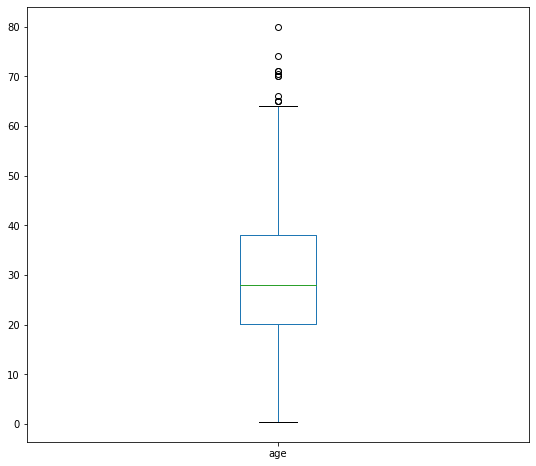

In [14]:
df6 = pd.DataFrame(df, columns=["age", "survived"])
df6.plot(x="survived", y=["age"], kind="box", figsize=(9, 8))
plt.show()

Este diagrama de caja nos arroja diferente información, de ella podemos concluir que:
1. Los 3 primeros cuartiles se encuentran debajo de los 40 años.
2. La mediana se encuentra entre los 20 y los 30 años, antes de llegar a los 30.
3. El mayor número de datos se encuentra abajo de los 40 años.


Dada esta información, podemos concluir que en efecto, la edad fue un factor influyente en la supervivencia, dado que más pasajeros jovenes sobrevivieron en comparación a los pasajeros de edad avanzada, además, esta diferencia aumenta junto con la edad.

#### 7. Dados los datos personales de cada uno de ustedes (estudiantes de Introduccción a la Ciencia de Datos) ¿hubiera sido más probable que se salvaran o que fallecieran? Si no desean utilizar sus datos verdaderos, elíjanlos al azar. Además, la edad estratifíquenla en lustros (bloques de 5 años). (Valor: 1 punto)

Estratificación por lustros de la edad

In [15]:
df7 = pd.DataFrame(df, columns=["age"])
df7= df7.dropna()
df7

,age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
885,39.0
886,27.0
887,19.0
889,26.0


In [16]:
df7['lustrums']=df7['age'].apply(lambda x:round(x/5))
df7
#T['age (lustros)']=T['age'].apply(lambda x:math.ceil(x/5))

,age,lustrums
0,22.0,4
1,38.0,8
2,26.0,5
3,35.0,7
4,35.0,7
...,...,...
885,39.0,8
886,27.0,5
887,19.0,4
889,26.0,5


Primero creamos datos al azar

In [17]:
dataLDH={'survived':np.nan,
         'pclass':3,
         'sex':'male',
         'age':21,
         'sibsp':0,
         'parch':0,
         'fare':55.2,
         'embarked':"Q",
         'class':'Third',
         'who':'man',
         'adult_male':True,
         'embark_town':'Queenstown',
         'alive':np.nan,
         'alone':False,
         'lustrums':4}

LDH=pd.Series(dataLDH)

Le aplicamos la regla:

In [18]:
survival(LDH)

0

#### No sobreviviría  :(

#### 8. ¿Cuál es el promedio de edad de los fallecidos que embarcaron en Queenstown? (Valor: 1 punto)

Para este ejercicio:
1. Creamos un nuevo dataframe con las columnas de 'embark_town', 'survived' y 'age'. 

2. Queremos saber el promedio de edad de los fallecidos que embarcaron en Queenstown, entonces definimos las condiciones correspondientes. En este caso, 'embark_town' debe ser Queenstown, y los valores de 'survived' con 0. 

3. Soltamos los valores que no son numéricos y finalmente, sacamos la media de la columna 'age'. 

Esto nos da un resultado de 30.325

In [19]:
titanic9 = df[['embark_town', 'survived', 'age']]
titanic9= (titanic9[(titanic9['survived'] == 0) & (titanic9['embark_town'] == 'Queenstown')]).dropna()
titanic9["age"].mean()

30.325

## Conclusiones


Después de analizar los datos e interpretarlos adecuadamente, pudimos obtener una gran cantidad de información sobre los datos de este conjunto. Este proceso no hubiera sido posible sin la utilización de las herramientas que las bibliotecas de Python anteriormente mencionadas nos provee, como gráficas de distintos tipos, medidas de tendencia central, uso de estructuras de datos, entre otras.

Pudimos obtener información específica de atributos en particular, como el promedio de los fallecidos en Queenstown, así como información más general, como la respuesta a la pregunta de que si la edad influía en la supervivencia de los pasajeros. De la misma manera, pude saber si la clase de los pasajeros influía en la supervivencia, así como los porcentajes de supervivencia entre mujeres, hombres y niños y el pueblo de embarque más mortífero. Una vez que convertí estos datos en información, pude observar un patrón consistente de supervivencia. Había pueblos en los que fue más probable sobrevivir, así como género, edad y clase. A partir de esta información pude generar una regla que permitía predecir si una persona con cirtas características sobreviviría el hundimiento del Titanic dadas las caractrísticas de la gente que sí lo hizo. 

Con esto podemos concluir que el Análisis de datos es un proceso altamente útil e interesante que nos permite revelar información escondida en datos, pero para esto, es necesario realizar los ajustes necesarios a través del Formateo o Limpieza de Datos, también conocido como Data Wrangling. Las posibilidades relativas a estos procesos son muy grandes y es posible aplicarlas a cualquier tipo de proyecto en cualquier disciplina, explicando así la versatilidad de la Ciencia de Datos.

## Referencias


1.  N/A. (2021). seaborn: statistical data visualization. abril 2, 2022, de Seaborn Sitio web: https://seaborn.pydata.org/#
2.  N/A. (2021). pandas documentation abril 2, 2022, de Pandas Sitio web: https://pandas.pydata.org/docs/#